In [2]:
import pandas as pd # Import pandas with alias pd, so it is easier to use and refer to.
import numpy as np # Import numpy with alias np, so it is easier to use and refer to.
import matplotlib # Import whole package of matplotlib in order to get version number. Bad practice, see further below.

In [3]:
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")

import matplotlib.pyplot as plt # Import only pyplot from matplotlib. Good practice, this way you know where the function comes from.

Pandas version: 2.1.4
Numpy version: 1.26.2
Matplotlib version: 3.8.2


In [ ]:
raw_data = pd.read_csv("week2-data-handling/data/data.csv") # Read in the data using pandas read_csv function. The data is stored in a pandas DataFrame.

print(raw_data.head()) # Show the first 5 rows of the data.
print(raw_data.columns) # Show the column names.
print(raw_data['order_id']) # Show the column with the name 'order_id'.
print(raw_data.dtypes) # Show the data types of each column.

In [ ]:
raw_data_copy = raw_data.copy()
raw_data_copy['order_id'] = raw_data['order_id'].apply(lambda x: str(x)) #stringify
raw_data_copy['order_cost'] = raw_data['order_cost'].apply(lambda x: x[1:]).astype('float64') #gets rid of dolalr sign in first position
raw_data_copy['country'] = raw_data['country'].astype('category') # Convert country to category.
raw_data_copy['email'] = raw_data['email'].apply(lambda x: str(x)) #stringify
print(raw_data_copy.dtypes)

In [49]:
raw_data_copy.replace('nan', np.nan, inplace=True) # Replace all 'nan' strings with np.nan; inplace keyword makes changes directly to dataframe
for col in raw_data_copy.columns: # Loop through each column.
    print(f"{col}: {raw_data_copy[col].isna().sum()}") # Check for missing values in each column.

order_id: 0
order_cost: 0
deal_category: 0
country: 0
email: 4


In [ ]:
raw_data_copy.loc[raw_data_copy['email'].isna(), 'email'] # Check the rows where email is NaN using pd.loc for a conditional selection.
raw_data_copy.iloc[[19, 20, 35, 89, 96]] # Check the rows where email is 'nan' using pd.iloc for index reference.

In [19]:
clean_data = raw_data_copy.drop(index=[19, 35, 89, 96]) # Drop the rows where email is 'nan' using the index reference from above.
clean_data = clean_data.reset_index(drop=True) # Reset the index so it is continuous, with no gaps after dropping rows. We now have a clean dataset.
print(clean_data.head())

      order_id  order_cost  deal_category  country  \
0  UXX58VDI7SD        7.13              2  Nigeria   
1  NPO10QWN4TG       30.39              9   France   
2  JTK76CIG9CP       32.94              7  Austria   
3  RVG43RZL3IR       18.41              5  Austria   
4  CXQ11AKY1OT        7.15              0  Ireland   

                              email  
0              nec.luctus@yahoo.org  
1    eleifend.nec.malesuada@aol.net  
2       facilisis.vitae@outlook.com  
3   enim.etiam.imperdiet@yahoo.couk  
4  phasellus.ornare.fusce@yahoo.org  


In [20]:
# Now we have cleaned the data, we can start some basic analysis.

clean_data.describe(include='all') # Show basic some descriptive statistics of the data.

,order_id,order_cost,deal_category,country,email
count,96,96.000000,96.000000,96,96
unique,96,NaN,NaN,34,96
top,UXX58VDI7SD,NaN,NaN,Singapore,nec.luctus@yahoo.org
freq,1,NaN,NaN,8,1
mean,NaN,49.588021,4.895833,NaN,NaN
std,NaN,29.101728,2.739493,NaN,NaN
min,NaN,1.350000,0.000000,NaN,NaN
25%,NaN,25.700000,3.000000,NaN,NaN
50%,NaN,50.705000,5.000000,NaN,NaN
75%,NaN,76.965000,7.000000,NaN,NaN


In [21]:
# Let's find the minimum and maximum order cost.

max_order = clean_data['order_cost'].min() # Find the minimum value in the column
min_order = clean_data['order_cost'].max() # Find the maximum value in the column

print(f"Max order: ${max_order}")
print(f"Min order: ${min_order}")

Max order: $1.35
Min order: $99.37


In [23]:
# Let's find the distrubition of deal categories.

deal_cat_count = clean_data['country'].value_counts() 
print(deal_cat_count) # Print the counts

country
Singapore             8
Austria               6
Canada                5
Italy                 5
Germany               5
France                4
Ukraine               4
Russian Federation    4
Spain                 4
Ireland               4
Indonesia             3
Netherlands           3
Australia             3
Sweden                3
United Kingdom        3
United States         3
Nigeria               3
Norway                2
South Africa          2
New Zealand           2
Mexico                2
Costa Rica            2
China                 2
Brazil                2
Belgium               2
Vietnam               2
Pakistan              1
Philippines           1
Poland                1
India                 1
South Korea           1
Colombia              1
Turkey                1
Chile                 1
Name: count, dtype: int64


In [ ]:
# Let's find the average order cost for each deal category.

deal_cat_mean = clean_data.groupby('deal_category')['order_cost'].mean() # Group the data by deal category, then find the mean of order cost for each group
print(deal_cat_mean) # Print the means

In [ ]:
grouped_deal_cat = clean_data.groupby('country')['deal_category'].apply(lambda x: x.value_counts().index[0])
print(grouped_deal_cat)

In [ ]:
# Let's continue on and explore if there is a relationship between order cost and deal category.

plt.bar(clean_data['deal_category'].unique(), deal_cat_mean) # Plot the mean order cost for each category in a bar chart.
plt.xlabel('Deal Category') # Label the x axis.
plt.ylabel('Mean Order Cost') # Label the y axis.
plt.title('Mean Order Cost by Deal Category') # Title the plot.
plt.show() # Show the plot.

In [32]:
# Let's test the correlation between order cost and deal category using numpy's corrcoef function.
# Note that correlation does not imply causation and is a very basic test of the relationship between two variables.
# For more information on correlation, see https://en.wikipedia.org/wiki/Correlation_and_dependence.
# A value of 0 means no correlation, a value of 1 means perfect correlation, and a value of -1 means perfect negative correlation.

corr_value = np.corrcoef(clean_data['order_cost'], clean_data['deal_category']) # Find the correlation coefficient between order cost and deal category.
print(f"Correlation coefficient: {corr_value[0, 1]}") # Print the correlation coefficient, note that the corrcoef function returns a 2x2 matrix, so we need to index the value we want.

Correlation coefficient: 0.1653930115412223


In [ ]:
# Let's plot a histogram of the order_cost column, helping us to visualise the distribution of values across the orders.

plt.hist(clean_data['order_cost'], bins=20) # Plot a histogram of order_cost with 20 bins.
plt.xlabel('Order Cost ($)') # Set the x-axis label.
plt.ylabel('Frequency') # Set the y-axis label.
plt.xticks(rotation=45) # Rotate the x-axis labels by 45 degrees.
plt.xticks(np.arange(0, 100, 5)) # Set the x-axis ticks to be every 5 dollars, as we know the range of values is between 0 and 100 from our previous analysis.
plt.show() # Show the plot.

In [ ]:
# Now let's explore the relationship between order_cost and country. 
# To begin let's look at the number of orders from each country.

num_orders_country = clean_data['country'].value_counts() # Count the number of orders from each country.
plt.bar(num_orders_country.index, num_orders_country) # Plot a bar chart of the number of orders from each country.
plt.xlabel('Country') # Set the x-axis label
plt.ylabel('Number of orders') # Set the y-axis label
plt.xticks(rotation=90) # Rotate the x-axis labels by 90 degrees
plt.title('Number of orders by country') # Set the title
plt.show() # Show the plot

C:\Users\jomercurio\AppData\Local\Temp\ipykernel_24588\71512808.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_order_per_country = clean_data.groupby('country')['order_cost'].mean() # Find the mean order_cost for each country


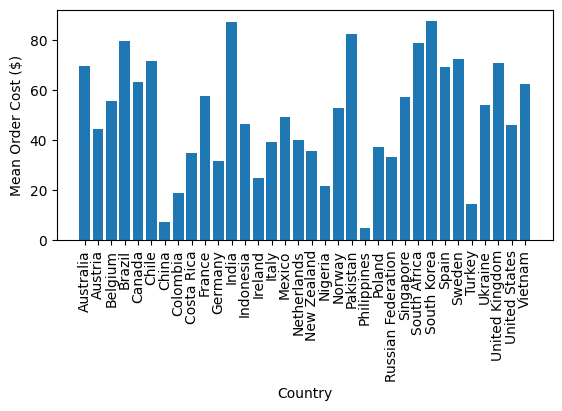

In [43]:
mean_order_per_country = clean_data.groupby('country')['order_cost'].mean() # Find the mean order_cost for each country
plt.bar(mean_order_per_country.index, mean_order_per_country) # Plot a bar chart of the mean order_cost for each country
plt.xlabel('Country') # Set the x-axis label
plt.ylabel('Mean Order Cost ($)') # Set the y-axis label
plt.xticks(rotation=90) # Rotate the x-axis labels by 90 degrees
plt.subplots_adjust(bottom=0.4) # Adjust the bottom of the plot to make room for the x-axis labels
plt.show() # Show the plot

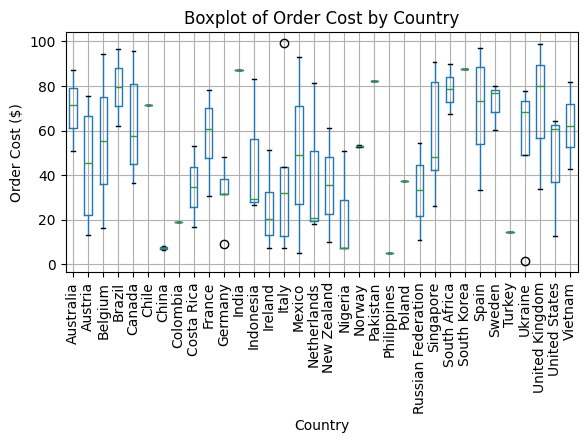

In [44]:
# Let's view the distribution of order_cost by country using a boxplot.
# A box plot shows the distribution of values for each category, as well as the median, interquartile range and outliers.
# In the below plot, the box represents the interquartile range, the line in the middle of the box is the median, the whiskers represent the range of values, and the dots are outliers.
# As some countries have a lot more orders than others, it is difficult to see the distribution of values for each country.

clean_data.boxplot(column='order_cost', by='country') # Plot a boxplot of order_cost by country
plt.ylabel('Order Cost ($)') # Set the y-axis label
plt.xlabel('Country') # Set the x-axis label
plt.xticks(rotation=90) # Rotate the x-axis labels by 90 degrees
plt.subplots_adjust(bottom=0.4) # Adjust the bottom of the plot to make room for the x-axis labels
plt.suptitle('') # Remove the default super-title
plt.title('Boxplot of Order Cost by Country') # Set the title of the plot
plt.show() # Show the plot

In [ ]:
# Let's plot a boxplot of order_cost by country, but only for the top 5 countries by number of orders.
# This will allow us to see the distribution of values for each country more clearly, as the number of orders is more similar between countries.

top_5_countries = clean_data['country'].value_counts().index[:5] # Get the top 5 countries by number of orders using the index of the value_counts series and slicing.
clean_data_top_5 = clean_data.loc[clean_data['country'].isin(top_5_countries)] # Filter the data to only include the top 5 countries using pd.loc for a conditional selection and the isin function.
clean_data_top_5.boxplot(column='order_cost', by='country') # Plot a boxplot of order_cost by country.
plt.ylabel('Order Cost ($)') # Set the y-axis label.
plt.xlabel('Country') # Set the x-axis label.
plt.xticks(rotation=90) # Rotate the x-axis labels by 90 degrees.
plt.subplots_adjust(bottom=0.4) # Adjust the bottom of the plot to make room for the x-axis labels.
plt.suptitle('') # Remove the default super-title.
plt.title('Boxplot of Order Cost by Country (Top 5)') # Set the title of the plot.
plt.show() # Show the plot.

In [ ]:
#Define packages/modules top of file
import time

#Fixed variables are capitalized
SET_NUMBER = 1000
OPTIONS = ["1) Add", "2) Subtract", "3) Multiply", "4) Divide", "5) Iterate Difference"]

print ("Welcome to the Python Calculator!") 
time.sleep(1)
print ("Please select an option from the following:")
time.sleep(1)
for i in OPTIONS: print (i) 
time.sleep(1)
optionNumber = input("Enter a number from the options above:")
time.sleep(1)
inputNumber = input("Enter a number for this calculator")
def addNumbers(num):
    return num + SET_NUMBER
def subtractNumbers(num):
    return num - SET_NUMBER
def multiplyNumbers(num):
    return num * SET_NUMBER
def divideNumbers(num):
    return num / SET_NUMBER
def iterateDifference(num):
    for i in range(SET_NUMBER, int(num)):
        if "69" in str(i):
            print("Nice")
        else:
            print("Count:" + str(i))
if optionNumber == "1":
    print("Adding " + str(SET_NUMBER) + " to " + str(inputNumber) + " equals " + str(addNumbers(inputNumber)))
elif optionNumber == "2":
    print("Subtracting " + str(SET_NUMBER) + " from " + str(inputNumber) + " equals " + str(subtractNumbers(inputNumber)))
elif optionNumber == "3":
    print("Multiplying " + str(SET_NUMBER) + " by " + str(inputNumber) + " equals " + str(multiplyNumbers(inputNumber)))
elif optionNumber == "4":
    print("Dividing " + str(SET_NUMBER) + " by " + str(inputNumber) + " equals " + str(divideNumbers(inputNumber)))
elif optionNumber == "5":
    print("Iterating from " + str(SET_NUMBER) + " to " + str(inputNumber) + " gives: ")
    time.sleep(1)
    iterateDifference(inputNumber)